In [2]:
import logging
import sacrebleu
import pandas as pd
from simpletransformers.t5 import T5Model, T5Args
from bert_score import score
from bert_score import plot_example
import matplotlib.pyplot as plt
from numpy import arange

import torch
import pickle

logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

In [3]:
eval_df = pd.read_csv("en-mr/eval.tsv", sep="\t").astype(str)
eval_df=eval_df[0:2000]

native_truth = [eval_df.loc[eval_df["prefix"] == "translate english to native"]["target_text"].tolist()]
to_native = eval_df.loc[eval_df["prefix"] == "translate english to native"]["input_text"].tolist()

english_truth = [eval_df.loc[eval_df["prefix"] == "translate native to english"]["target_text"].tolist()]
to_english = eval_df.loc[eval_df["prefix"] == "translate native to english"]["input_text"].tolist()

In [4]:
model_args = T5Args()
model_args.max_length = 512
model_args.length_penalty = 1
model_args.num_beams = 4
model_args.eval_batch_size = 1


model = T5Model("mt5", "outputs", args=model_args)

In [ ]:
native_preds = model.predict(to_native)

eng_sin_bleu = sacrebleu.corpus_bleu(native_preds, native_truth)
print("--------------------------")
print("English to Marathi: ", eng_sin_bleu.score)

C:\Users\rohit\anaconda3\envs\st\lib\site-packages\transformers\tokenization_utils_base.py:3255: FutureWarning: `prepare_seq2seq_batch` is deprecated and will be removed in version 5 of 🤗 Transformers. Use the regular `__call__` method to prepare your inputs and the tokenizer under the `with_target_tokenizer` context manager to prepare your targets. See the documentation of your specific tokenizer for more details
  warnings.warn(


In [ ]:
# Predict


english_preds = model.predict(to_english)

sin_eng_bleu = sacrebleu.corpus_bleu(english_preds, english_truth)
print("Marathi to English: ", sin_eng_bleu.score)

In [53]:
tru = "कोल्हापूर आणि सांगली जिल्ह्यात पुराने थैमान घातलंय."


pre=model.predict([tru])
print(pre)


['In Kolhapur and Sangli districts, floods have wreaked havoc.']


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


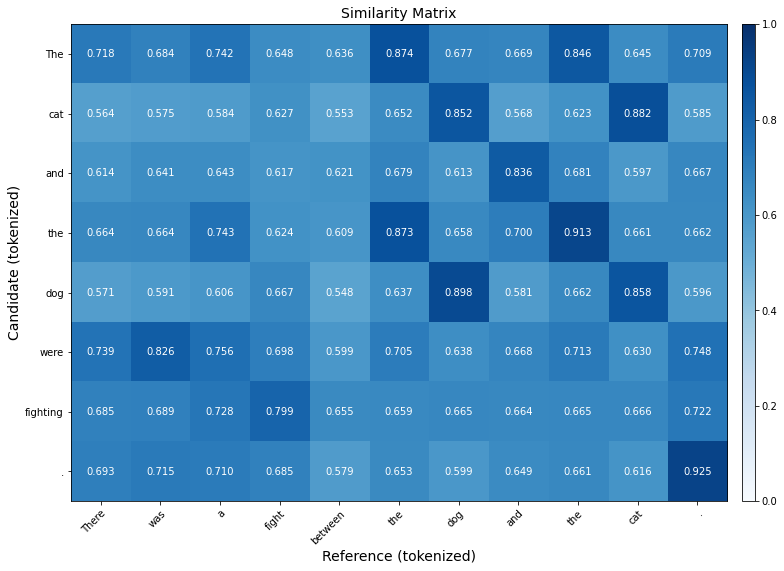

In [28]:
plot_example(tru, 'There was a fight between the dog and the cat.' , lang="mr")

In [13]:
english_preds[100]

'Five people were killed in the accident.'

In [12]:
english_truth[0][100]

'Five persons died in the accident.'

In [16]:
torch.cuda.empty_cache()


In [9]:
P, R, F1 = score(english_preds, english_truth[0], lang='en', verbose=True)

Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


calculating scores...
computing bert embedding.



computing greedy matching.



done in 6.45 seconds, 154.94 sentences/sec


In [23]:
arange(0.5,1,0.1)

array([0.5, 0.6, 0.7, 0.8, 0.9])

In [18]:
len(english_truth[0])

250

In [17]:
with open('english_preds', 'wb') as fp:
    pickle.dump(english_preds, fp)
    


In [5]:
with open('marathi_preds', 'wb') as fp:
    pickle.dump(native_preds, fp)
    

In [5]:
with open ('english_preds', 'rb') as fp:
    english_preds = pickle.load(fp)
with open ('marathi_preds', 'rb') as fp:
    native_preds = pickle.load(fp)    
    

In [11]:
with open('F1', 'wb') as fp:
    pickle.dump(F1, fp)

In [17]:
with open('F1', 'rb') as fp:
    F1 = pickle.load(fp)    

In [6]:
with open('F1mr', 'wb') as fp:
    pickle.dump(F1mr, fp)

In [14]:
with open('F1mr', 'rb') as fp:
    F1mr = pickle.load(fp)    

In [4]:
Pmr, Rmr, F1mr = score(native_preds, native_truth[0], lang='mr', verbose=True)

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


calculating scores...
computing bert embedding.



computing greedy matching.



done in 7.26 seconds, 137.67 sentences/sec


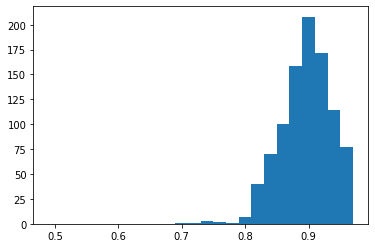

In [19]:
plt.hist(F1.numpy(), bins=arange(0.5,1,0.02),align='left')
plt.show()

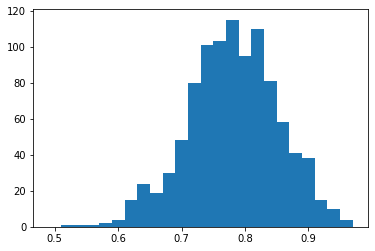

In [15]:
plt.hist(F1mr.numpy(), bins=arange(0.5,1,0.02),align='left')
plt.show()

In [12]:
length=list()
for text in english_truth[0]:
    length.append(len(text.strip().split()))


In [18]:
len(F1)

1000

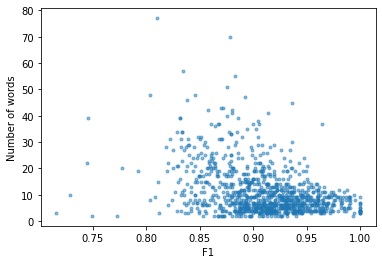

In [25]:
plt.scatter(F1, length, alpha=0.5, marker='.')
plt.xlabel('F1')
plt.ylabel('Number of words')
plt.show()

In [21]:
import spacy
nlp = spacy.load('en_core_web_lg')
english_preds_nlp=list()
for pred in english_preds:
    english_preds_nlp.append(nlp(pred))
    
english_truth_nlp=list()
for truth in english_truth[0]:
    english_truth_nlp.append(nlp(truth))    

In [31]:
english_preds_nlp[1].similarity(english_truth_nlp[1])

0.9449963148508814

In [23]:
nlp("hi")

hi

In [38]:
spacey_sc=list()
for (truth,pred) in zip(english_truth_nlp,english_preds_nlp):
    spacey_sc.append(pred.similarity(truth))

<ipython-input-38-aa6d1b0dba63>:3: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  spacey_sc.append(pred.similarity(truth))


In [39]:
spacey_sc

[0.8582505232576091,
 0.9449963148508814,
 0.908133434204275,
 0.9962143496742141,
 0.6735767322745265,
 0.9212892416568196,
 0.0,
 0.9294777746811217,
 0.9337751026060698,
 0.9531786092220984,
 0.9272017686168452,
 0.951878906257508,
 0.9391488525043444,
 0.9312224540222309,
 0.866087794578825,
 0.8108219317805818,
 0.39665059267297625,
 0.8477142859495714,
 0.6158325298309244,
 0.8572734123491734,
 0.9715729183072648,
 0.6998967010649961,
 0.9209504018457831,
 0.9409614179870307,
 0.94853861331258,
 0.9792133113169808,
 0.9267296963098252,
 0.981844954210818,
 0.8380813421410275,
 0.9874102412530241,
 0.8081473012725273,
 0.8156199877083011,
 0.9212089052890617,
 1.0,
 0.8330337186070849,
 0.9223171838280874,
 0.960064222216343,
 0.7863860177026881,
 0.9488672992049444,
 0.8666721260783851,
 0.764414454764739,
 0.9477432389123581,
 0.9427259721950191,
 0.9541550180661953,
 0.8625027385966205,
 0.9463777712623243,
 0.9080613870618688,
 0.9482837957017126,
 0.8560592412505537,
 0.68882

In [40]:
with open('spacey', 'wb') as fp:
    pickle.dump(spacey_sc, fp)

In [21]:
with open('spacey', 'rb') as fp:
    spacey_sc = pickle.load(fp)    

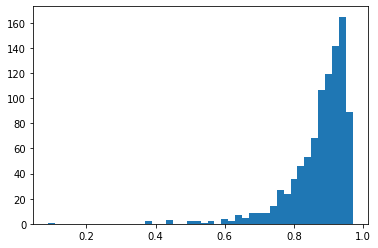

In [23]:
plt.hist(spacey_sc, bins=arange(0.1,1,0.02),align='left')
plt.show()